In [24]:
import pandas as pd

# Load dust event dates from the CSV file
csv_file = 'dust-date.csv'  # Update to the correct path if needed
dust_events = pd.read_csv(csv_file, parse_dates=['Date'], dayfirst=True)

# Convert 'Date' column to datetime format with mixed format handling
dust_events['Date'] = pd.to_datetime(dust_events['Date'], format='mixed', dayfirst=True)

# Filter events between 2005 and 2023
dust_events_filtered = dust_events[(dust_events['Date'].dt.year >= 2005) & (dust_events['Date'].dt.year <= 2023)]

# Sort the events by date in ascending order
dust_events_sorted = dust_events_filtered.sort_values(by='Date').reset_index(drop=True)

# Display the sorted dust event dates
print(dust_events_sorted)

# Save the sorted events to a new CSV file
sorted_csv_file = 'dust1_events_sorted_2005_2023.csv'
dust_events_sorted.to_csv(sorted_csv_file, index=False)

# Output path to the new sorted CSV file
sorted_csv_file


     station                Date  year month  hour
0        MCE 2005-02-27 19:53:00  2005   Feb    19
1        SCK 2005-02-27 20:55:00  2005   Feb    20
2        MYV 2005-02-27 21:53:00  2005   Feb    21
3        BFL 2005-04-23 01:54:00  2005   Apr     1
4        SMF 2005-08-30 16:53:00  2005   Aug    16
...      ...                 ...   ...   ...   ...
3362     MCE 2023-12-18 21:53:00  2023   Dec    21
3363     MAE 2023-12-18 21:53:00  2023   Dec    21
3364     OVE 2023-12-27 18:53:00  2023   Dec    18
3365     BAB 2023-12-27 18:55:00  2023   Dec    18
3366     MYV 2023-12-27 19:53:00  2023   Dec    19

[3367 rows x 5 columns]


/tmp/ipykernel_1166634/2993728303.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dust_events = pd.read_csv(csv_file, parse_dates=['Date'], dayfirst=True)


'dust1_events_sorted_2005_2023.csv'

In [36]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Load the CSV file with dust dates
dust_dates_path = 'date1.csv'
dust_dates = pd.read_csv(dust_dates_path)

# Load the NetCDF file with pressure data
pressure_data_path = 'presssure.nc'
pressure_data = xr.open_dataset(pressure_data_path)

# Convert the dust event dates to datetime and round to the nearest hour
dust_dates['Date'] = pd.to_datetime(dust_dates['Date'], format='%d/%m/%Y %H:%M')
dust_dates['Rounded_Date'] = dust_dates['Date'].dt.round('1H')

# Extract unique rounded dates for pressure matching
unique_rounded_dates = dust_dates['Rounded_Date'].unique()




/tmp/ipykernel_1166634/3136000668.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dust_dates['Rounded_Date'] = dust_dates['Date'].dt.round('1H')


In [37]:
unique_rounded_dates

<DatetimeArray>
['2005-02-27 20:00:00', '2005-02-27 21:00:00', '2005-02-27 22:00:00',
 '2005-04-23 02:00:00', '2005-08-30 17:00:00', '2005-09-21 01:00:00',
 '2005-09-21 02:00:00', '2005-09-26 22:00:00', '2005-09-26 23:00:00',
 '2005-10-04 04:00:00',
 ...
 '2017-11-25 21:00:00', '2017-11-27 19:00:00', '2017-12-03 18:00:00',
 '2017-12-16 09:00:00', '2017-12-16 10:00:00', '2017-12-16 13:00:00',
 '2017-12-16 14:00:00', '2017-12-16 16:00:00', '2017-12-16 23:00:00',
 '2017-12-20 22:00:00']
Length: 960, dtype: datetime64[ns]

In [38]:
# Filter pressure data for the matching dates
pressure_data_subset = pressure_data.sel(time=unique_rounded_dates, method="nearest")

# Calculate the composite mean of surface pressure on the dust dates
pressure_composite = pressure_data_subset['sp'].mean(dim='time')



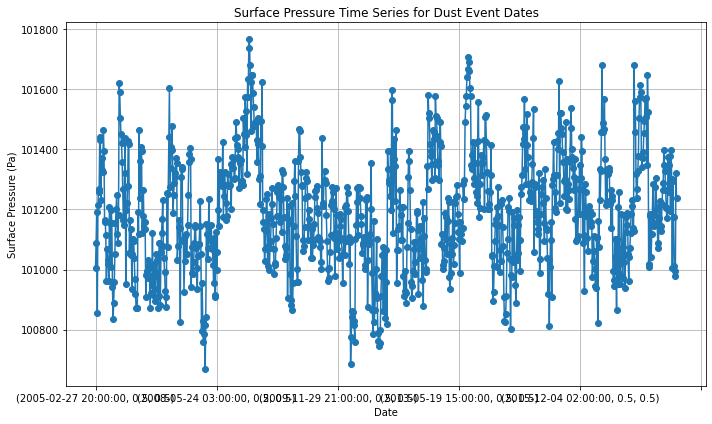

In [39]:
# Extract the time series of surface pressure for the rounded dust dates
pressure_time_series = pressure_data_subset['sp'].to_series()

# Plotting the time series
plt.figure(figsize=(10, 6))
pressure_time_series.plot(marker='o', linestyle='-', title='Surface Pressure Time Series for Dust Event Dates')
plt.xlabel('Date')
plt.ylabel('Surface Pressure (Pa)')
plt.grid()
plt.tight_layout()
plt.show()


In [42]:

# Save the composite mean pressure as a new NetCDF file
output_path = 'pressure_composite.nc'

pressure_data_subset.to_netcdf(output_path)

print(f"Composite data saved to: {output_path}")

Composite data saved to: pressure_composite.nc
